In [1]:
import pandas as pd
import numpy as np


In [2]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
Data= pd.read_csv('/content/gdrive/MyDrive/MSc Project/data_final.csv')

In [5]:
Data=Data.drop('Unnamed: 0',axis=1)

In [6]:
Data

,Trope,Description,FemaleTokens,MaleTokens,TotalMFTokens
0,abandonedarea,abandoned places make good settings for fictio...,5.0,30.0,35.0
1,abandonedcatchphrase,catchphrases are a great and simple way to hel...,23.0,29.0,52.0
2,abandonedhospital,the creepy abandoned hospital/mental instituti...,23.0,40.0,63.0
3,abandonedmine,maybe there's nothing left to mine. maybe it w...,6.0,23.0,29.0
4,abandonedplayground,there's just something about the image of a pl...,16.0,24.0,40.0
...,...,...,...,...,...
1540,recountedbythemaincharacters,"sometimes, ""this is a true story"" is part of t...",109.0,728.0,837.0
1541,bythepowerofgreyskull,lots of phlebotinum is voice activated: kirk t...,178.0,966.0,1144.0
1542,crouchingniceguyhiddenjerkass,you meet someone you think is a really nice gu...,760.0,1003.0,1763.0
1543,narroweditdowntotheguyirecognise,big-name actors tend to get major roles in med...,583.0,2109.0,2692.0


In [7]:
Data['Description'].iloc[:1545]

0       abandoned places make good settings for fictio...
1       catchphrases are a great and simple way to hel...
2       the creepy abandoned hospital/mental instituti...
3       maybe there's nothing left to mine. maybe it w...
4       there's just something about the image of a pl...
                              ...                        
1540    sometimes, "this is a true story" is part of t...
1541    lots of phlebotinum is voice activated: kirk t...
1542    you meet someone you think is a really nice gu...
1543    big-name actors tend to get major roles in med...
1544    you're being given an award, but not for somet...
Name: Description, Length: 1545, dtype: object

##Create NLP Pipeline - spaCy


In [8]:
!pip install --upgrade spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
 !python -m spacy download en_core_web_md

2022-09-15 13:38:21.441206: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.8 MB 232 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [10]:
import spacy
nlp = spacy.load('en_core_web_md') 
data_processed= list(nlp.pipe(Data['Description'].iloc[:1545])) #Creating NLP piepline

In [11]:
token_processed = []
for doc in (data_processed):
  # let's collect all valid tokens (i.e. no stop words, no punctuation) into a list
  token_processed.append([( token.lemma_)  for token in doc if not (token.is_stop or token.is_punct or token.is_digit)]) #processed token without stopwords and digits

#Print processed tokens
i=0
for token in enumerate(token_processed):
  print('\n', token)
  i=i+1
  if i>10:
    break


 (0, ['abandon', 'place', 'good', 'setting', 'fiction', 'normally', 'see', 'fiction', 'evoke', 'type', 'horror', 'concept', 'place', 'abandon', 'make', 'unnerving', 'feeling', 'viewer', 'create', 'suspense', 'increase', 'surprise', 'turn', 'place', 'abandon', 'use', 'abandon', 'place', 'aesthetic', 'aid', 'normally', 'overlap', 'scenery', 'gorn', 'depend', 'state', 'location', 'justified', 'example', 'osha', 'compliance', 'bother', 'health', 'safety', 'abandoned?sub', 'trope', 'recycle', 'building', 'beautiful', 'void', 'related', 'trope', 'unexpectedly', 'abandon', 'bat', 'scare', 'frequently', 'abandon', 'area', 'city', 'abandon', 'police', 'will', 'city', 'narrow', 'robert', 'a.', 'heinlein', 'term', 'abandon', 'area', 'fear', 'evil', 'refer', 'city'])

 (1, ['catchphrase', 'great', 'simple', 'way', 'help', 'character', 'image', 'catchphrase', 'stick', 'writer', 'experiment', 'early', 'eventually', 'decide', 'catchphrase', 'death', 'long', 'funny', 'character', 'simply', 'evolve', 

In [12]:
train_doc_tokens= []
for doc in token_processed:
  train_doc_tokens.append(len(doc)) #the length of a spaCy document is the number of tokens


##Distribution of Token length

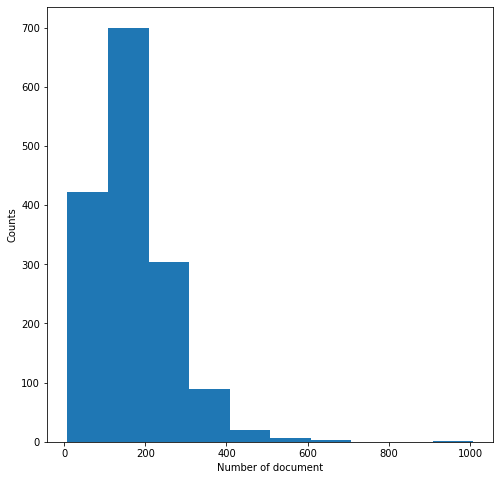

In [13]:
import matplotlib.pyplot as plt
# plot the distribution of lengths in an histogram
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.hist(train_doc_tokens)
ax.set_xlabel('Number of document')
_ =ax.set_ylabel('Counts')


##CountVectorizer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

def tokenizer(x):
  #X is a list of tokens
  return x
def get_top_ngram(spacy_tokenized_corpus, ngram_range, top_n):
  vec= CountVectorizer(ngram_range=ngram_range,max_features=top_n,max_df=0.5,min_df=10,lowercase=False,tokenizer=tokenizer).fit(spacy_tokenized_corpus)
  BoW=vec.transform(spacy_tokenized_corpus) #Bag of Words created
  sum_words = BoW.sum(axis=0) 
    # get the words with their frequencies and order them
  words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return BoW, words_freq#[:10]

##Visualize Bag of Words model and Word Frequency using Countvectorizer

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


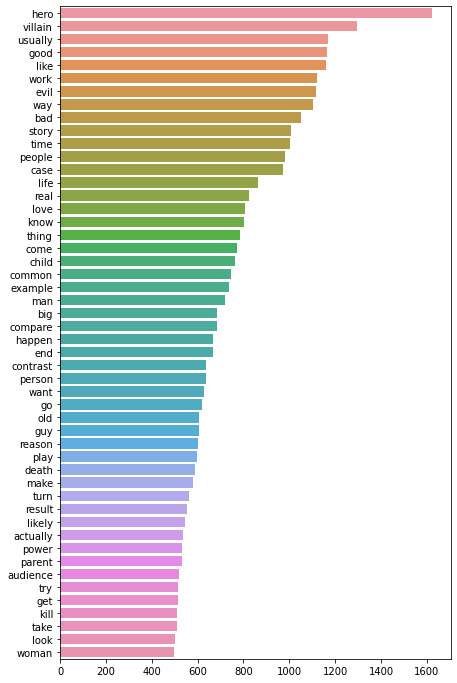

In [15]:
# let's get the words frequencies
BoW, words_freq= get_top_ngram(token_processed, ngram_range=(1,2), top_n= 50)

# let's plot them
import seaborn as sns
import matplotlib.pyplot as plt

# separate the n_grams from their frequencies
ngram_labels = [word[0] for word in words_freq]
ngram_freqs = [word[1] for word in words_freq]
plt.figure(figsize=(7,12))
sns.barplot(x=ngram_freqs,y=ngram_labels)


In [16]:
freq_table=pd.DataFrame(ngram_freqs,ngram_labels)
freq_table.head(10)

,0
hero,1623
villain,1296
usually,1170
good,1165
like,1162
work,1122
evil,1117
way,1104
bad,1053
story,1007


##Bag of Words Model : CountVectorizer

In [17]:
def tokenizer(x):
  #X is a list of tokens
  return x
def Bag_of_Words(spacy_tokenized_corpus, ngram_range):
  vec= CountVectorizer(ngram_range=ngram_range,max_df=0.5,min_df=25,lowercase=False,tokenizer=tokenizer).fit(spacy_tokenized_corpus)
  #max_df=0.5 means ignore terms that appear more than 50% of documents
  #min_df=25 means ignore terms that are less 10 documents
  BoW=vec.transform(spacy_tokenized_corpus) #Bag of Words created
  return BoW


BoW= Bag_of_Words(token_processed, ngram_range=(1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [18]:
Count_Bag_of_Words_Model=pd.DataFrame(BoW.toarray())
Count_Bag_of_Words_Model

,0,1,2,3,4,5,6,7,8,9,...,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513
0,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,4,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,0,0,0,0,0,1,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
1541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##TFIDF Vectorizer

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tokenizer(x):
  #X is a list of tokens
  return x
def get_top_ngram1(spacy_tokenized_corpus, ngram_range, top_n):
  vec1= TfidfVectorizer(ngram_range=ngram_range,max_features=top_n,max_df=0.5,min_df=10,lowercase=False,tokenizer=tokenizer)
  BoW1=vec1.fit_transform(spacy_tokenized_corpus) #Bag of Words created
  sum_words = BoW1.sum(axis=0) 
    # get the words with their frequencies and order them
  words_freq1 = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
  words_freq1 =sorted(words_freq1, key = lambda x: x[1], reverse=True)
  return BoW1, words_freq1 #[:10]

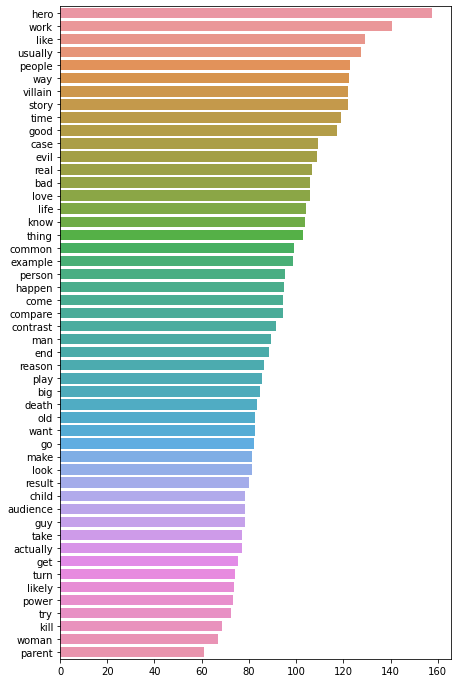

In [20]:
# let's get the words frequencies
BoW1, words_freq1= get_top_ngram1(token_processed, ngram_range=(1,2), top_n= 50)

# let's plot them
import seaborn as sns
import matplotlib.pyplot as plt

# separate the n_grams from their frequencies
ngram_labels1 = [word1[0] for word1 in words_freq1]
ngram_freqs1 = [word1[1] for word1 in words_freq1]
plt.figure(figsize=(7,12))
sns.barplot(x=ngram_freqs1,y=ngram_labels1)


In [21]:
freq_table1=pd.DataFrame(ngram_freqs1,ngram_labels1)
freq_table1.head(10)

,0
hero,157.611429
work,140.748279
like,129.019698
usually,127.684768
people,123.015912
way,122.440629
villain,122.188625
story,122.087338
time,118.944185
good,117.534789


##Bag of Words Model: TFIDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tokenizer(x):
  #X is a list of tokens
  return x
def Bag_of_Words_TFIDF(spacy_tokenized_corpus, ngram_range):
  vec1= TfidfVectorizer(ngram_range=ngram_range,max_df=0.5,min_df=25,lowercase=False,tokenizer=tokenizer)
  BoW1=vec1.fit_transform(spacy_tokenized_corpus) #Bag of Words created
  return BoW1

In [23]:
# let's get the words frequencies
BoW1= Bag_of_Words_TFIDF(token_processed, ngram_range=(1,1))


In [24]:
TFIDF_Bag_of_Words_Model=pd.DataFrame(BoW1.toarray())
TFIDF_Bag_of_Words_Model

,0,1,2,3,4,5,6,7,8,9,...,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513
0,0.0,0.767792,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.120978,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.659201,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.438110,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.111833,0.0
4,0.0,0.460898,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.073647,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,0.0,0.000000,0.0,0.0,0.0,0.081929,0.0,0.0,0.0,0.0,...,0.0,0.221148,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1541,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1542,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.068279,0.0
1543,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


##DBSCAN Clustering of countvectorizer

##Calculate pairwise distance of bag of words model using cosine similarity


In [ ]:
from sklearn.metrics import pairwise_distances
pairwise_distances_count=pairwise_distances(BoW, metric='cosine')
pairwise_distances_count

array([[0.        , 0.98702502, 0.4512171 , ..., 0.95695553, 0.99386075,
        0.96191225],
       [0.98702502, 0.        , 0.92972716, ..., 0.96597439, 0.98948533,
        0.95651146],
       [0.4512171 , 0.92972716, 0.        , ..., 0.94844241, 0.97090598,
        0.95702411],
       ...,
       [0.95695553, 0.96597439, 0.94844241, ..., 0.        , 0.90071934,
        0.90011862],
       [0.99386075, 0.98948533, 0.97090598, ..., 0.90071934, 0.        ,
        0.90740329],
       [0.96191225, 0.95651146, 0.95702411, ..., 0.90011862, 0.90740329,
        0.        ]])

##Dimentionality Reduction using - t-SNE
t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique used to visualize and explore high-dimensional data.

spacial relationships between data points in their original, higher dimensionality. Essentially, it can help us understand how data is distributed and arranged in high-dimensional space


 t-SNE is a dimensionality reduction technique that belongs to the Unsupervised branch of Machine Learning algorithms

In [ ]:
# from sklearn.manifold import TSNE

# tsne = TSNE(perplexity=30)  # it will check for points in neighborhood
# X_embedded_countvectorizer = tsne.fit_transform(pairwise_distances_count)


In [ ]:
# X_embedded_countvectorizer_spacy=X_embedded_countvectorizer.copy()

In [ ]:
# X_embedded_countvectorizer_spacy

In [ ]:
# X_embedded_countvectorizer

In [ ]:
# X_embedded_countvectorizer_spacy=pd.DataFrame(X_embedded_countvectorizer)
# from google.colab import drive

# path = '/content/drive/MyDrive/MSc Project/X_embedded_countvectorizer_spacy.csv'

# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   X_embedded_countvectorizer_spacy.to_csv(f)

In [ ]:
X_embedded_countvectorizer= pd.read_csv('/content/gdrive/MyDrive/MSc Project/X_embedded_countvectorizer_spacy.csv')
X_embedded_countvectorizer=X_embedded_countvectorizer.drop('Unnamed: 0',axis=1)
X_embedded_countvectorizer=np.asarray(X_embedded_countvectorizer)

#Finding optimum eps value 



Text(0, 0.5, 'Distance')

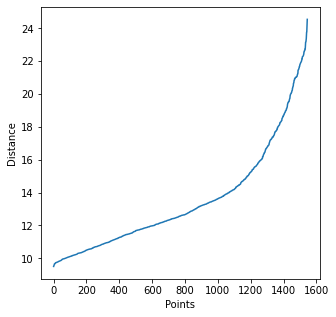

In [ ]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=100)
neighbors = nearest_neighbors.fit(X_embedded_countvectorizer)

distances, indices = neighbors.kneighbors(X_embedded_countvectorizer)
distances = np.sort(distances[:,99], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

##Identifying Elbow Point with Kneed Package 

14.4932185480719


<Figure size 360x360 with 0 Axes>

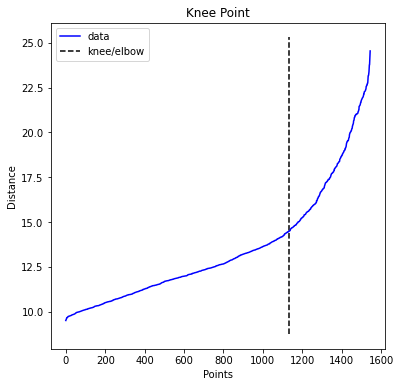

In [ ]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])
Epsilon_Value=[]
Epsilon=distances[knee.knee]
Epsilon_Value.append(Epsilon)

##DBSCAN Clustering with Optimal Epsilon

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=Epsilon, min_samples=100).fit(X_embedded_countvectorizer)
cluster=clustering.labels_
cluster
no_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
no_clusters_noise = len(set(cluster))
print('Estimated number of clusters with noise: %d' % no_clusters_noise)
print('Estimated number of clusters without noise: %d' % no_clusters_)
no_noise=np.sum(np.array(cluster)==-1,axis=0)
print('Estimated number of noise: %d' % no_noise)
Estimated_Noise=[]
Estimated_Clusters=[]
Estimated_Clusters_with_noise=[]
Estimated_Clusters.append(no_clusters_)
Estimated_Clusters_with_noise.append(no_clusters_noise)
Estimated_Noise.append(no_noise)

Estimated number of clusters with noise: 2
Estimated number of clusters without noise: 1
Estimated number of noise: 15


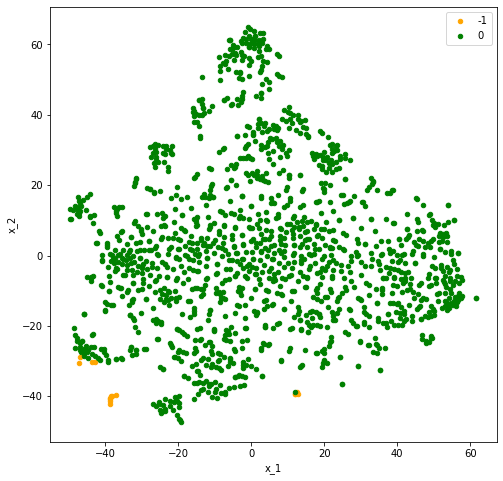

In [ ]:
def show_clusters(X_embedded_countvectorizer, cluster):
  df = pd.DataFrame(dict(x=X_embedded_countvectorizer[:,0], y=X_embedded_countvectorizer[:,1], label=cluster))
  colors = {-1: 'orange', 0: 'green', 1:'red'}
  fig, ax = plt.subplots(figsize=(8,8))
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()
show_clusters(X_embedded_countvectorizer, cluster)

##Silhouette Score

In [42]:
Silhouette_Score=[]

from sklearn import metrics
n_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_countvectorizer, cluster))
Silhouette_Score.append(metrics.silhouette_score(X_embedded_countvectorizer, cluster))

NameError: ignored

In [ ]:
Epsilon=14


Epsilon_Value.append(Epsilon)
clustering = DBSCAN(eps=Epsilon, min_samples=100).fit(X_embedded_countvectorizer)
cluster=clustering.labels_
no_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
no_clusters_noise = len(set(cluster))
print('Estimated number of clusters with noise: %d' % no_clusters_noise)
print('Estimated number of clusters: %d' % no_clusters_)
no_noise=np.sum(np.array(cluster)==-1,axis=0)
print('Estimated number of noise: %d' % no_noise)
Estimated_Clusters.append(no_clusters_)
Estimated_Clusters_with_noise.append(no_clusters_noise)
Estimated_Noise.append(no_noise)

Estimated number of clusters with noise: 2
Estimated number of clusters: 1
Estimated number of noise: 37


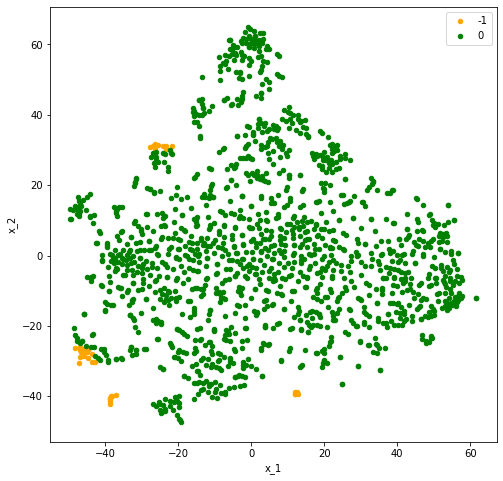

In [ ]:
def show_clusters(X_embedded_countvectorizer, cluster):
  df = pd.DataFrame(dict(x=X_embedded_countvectorizer[:,0], y=X_embedded_countvectorizer[:,1], label=cluster))
  colors = {-1: 'orange', 0: 'green', 1:'red', 2:'blue', 3:'yellow'}  #white= noice
  fig, ax = plt.subplots(figsize=(8,8))
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()

show_clusters(X_embedded_countvectorizer, cluster)


In [ ]:
n_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_countvectorizer, cluster))
Silhouette_Score.append(metrics.silhouette_score(X_embedded_countvectorizer, cluster))

1
Silhouette Coefficient: 0.182


In [ ]:
Epsilon=13.2

Epsilon_Value.append(Epsilon)
clustering = DBSCAN(eps=Epsilon, min_samples=100).fit(X_embedded_countvectorizer)
cluster=clustering.labels_
cluster_main=cluster
no_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
no_clusters_noise = len(set(cluster))
print('Estimated number of clusters with noise: %d' % no_clusters_noise)
print('Estimated number of clusters: %d' % no_clusters_)
no_noise=np.sum(np.array(cluster)==-1,axis=0)
print('Estimated number of noise: %d' % no_noise)
Estimated_Clusters.append(no_clusters_)
Estimated_Clusters_with_noise.append(no_clusters_noise)
Estimated_Noise.append(no_noise)

Estimated number of clusters with noise: 3
Estimated number of clusters: 2
Estimated number of noise: 101


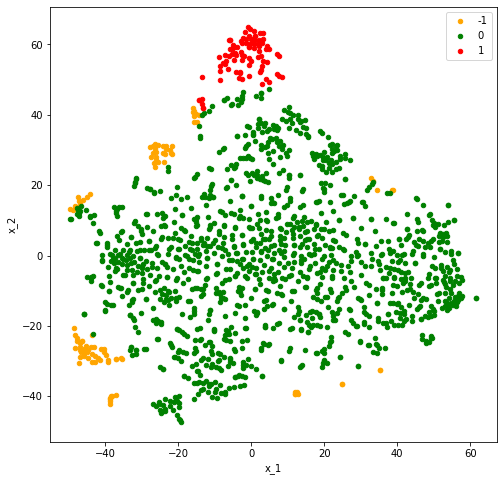

In [ ]:
def show_clusters(X_embedded_countvectorizer, cluster):
  df = pd.DataFrame(dict(x=X_embedded_countvectorizer[:,0], y=X_embedded_countvectorizer[:,1], label=cluster))
  colors = {-1: 'orange', 0: 'green', 1:'red', 2:'blue', 3:'yellow'}  #white= noice
  fig, ax = plt.subplots(figsize=(8,8))
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()
show_clusters(X_embedded_countvectorizer, cluster)

In [ ]:
n_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_countvectorizer, cluster))
Silhouette_Score.append(metrics.silhouette_score(X_embedded_countvectorizer, cluster))

2
Silhouette Coefficient: 0.157


In [ ]:
Epsilon=14.9
Epsilon_Value.append(Epsilon)
clustering = DBSCAN(eps=Epsilon, min_samples=100).fit(X_embedded_countvectorizer)
cluster=clustering.labels_
no_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
no_clusters_noise = len(set(cluster))
print('Estimated number of clusters with noise: %d' % no_clusters_noise)
print('Estimated number of clusters: %d' % no_clusters_)
no_noise=np.sum(np.array(cluster)==-1,axis=0)
print('Estimated number of noise: %d' % no_noise)
Estimated_Clusters.append(no_clusters_)
Estimated_Clusters_with_noise.append(no_clusters_noise)
Estimated_Noise.append(no_noise)

Estimated number of clusters with noise: 2
Estimated number of clusters: 1
Estimated number of noise: 8


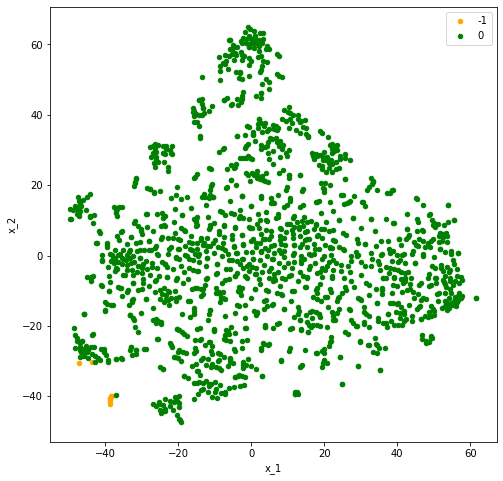

In [ ]:
def show_clusters(X_embedded_countvectorizer, cluster):
  df = pd.DataFrame(dict(x=X_embedded_countvectorizer[:,0], y=X_embedded_countvectorizer[:,1], label=cluster))
  colors = {-1: 'orange', 0: 'green', 1:'red', 2:'blue', 3:'yellow'}  #white= noice
  fig, ax = plt.subplots(figsize=(8,8))
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()
show_clusters(X_embedded_countvectorizer, cluster)

In [ ]:
n_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_countvectorizer, cluster))
Silhouette_Score.append(metrics.silhouette_score(X_embedded_countvectorizer, cluster))

1
Silhouette Coefficient: 0.213


In [ ]:
Estimated_Clusters_with_noise

[2, 2, 3, 2]

The Epsilon value greater than optimal value gives no clusters. All the points are considered as a single cluster. 

##Compare the outputs of DBSCAN Clustering


In [ ]:
data_count_tsne = {'Epsilon': Epsilon_Value,'Minimum Samples':[100,100,100,100],'Number of Clusters without Noise': Estimated_Clusters_with_noise,
                   'Number of Noise': Estimated_Noise,'Number of Clusters without Noise':Estimated_Clusters,'Silhouette Score':Silhouette_Score,'Number of Neighbors in KNN': [100,100,100,100]}
DBSCAN_Count_TSNE = pd.DataFrame(data_count_tsne)
DBSCAN_Count_TSNE


,Epsilon,Minimum Samples,Number of Clusters without Noise,Number of Noise,Silhouette Score,Number of Neighbors in KNN
0,14.493219,100,1,15,0.192890,100
1,14.000000,100,1,37,0.181957,100
2,13.200000,100,2,101,0.157432,100
3,14.900000,100,1,8,0.212645,100


In [ ]:
#Compare the Male and Female Tokens and Assign 0 and 1 (Male=0 and Female =1)
conditions = [Data['FemaleTokens'] > Data['MaleTokens'], 
              Data['FemaleTokens'] < Data['MaleTokens']]
choices = ['1', '0']
Data['Token_Labels'] = np.select(conditions, choices, default='Noise')
Data

,Trope,Description,FemaleTokens,MaleTokens,TotalMFTokens,Token_Labels
0,abandonedarea,abandoned places make good settings for fictio...,5.0,30.0,35.0,0
1,abandonedcatchphrase,catchphrases are a great and simple way to hel...,23.0,29.0,52.0,0
2,abandonedhospital,the creepy abandoned hospital/mental instituti...,23.0,40.0,63.0,0
3,abandonedmine,maybe there's nothing left to mine. maybe it w...,6.0,23.0,29.0,0
4,abandonedplayground,there's just something about the image of a pl...,16.0,24.0,40.0,0
...,...,...,...,...,...,...
1540,recountedbythemaincharacters,"sometimes, ""this is a true story"" is part of t...",109.0,728.0,837.0,0
1541,bythepowerofgreyskull,lots of phlebotinum is voice activated: kirk t...,178.0,966.0,1144.0,0
1542,crouchingniceguyhiddenjerkass,you meet someone you think is a really nice gu...,760.0,1003.0,1763.0,0
1543,narroweditdowntotheguyirecognise,big-name actors tend to get major roles in med...,583.0,2109.0,2692.0,0


In [ ]:
Data_cluster_Count=Data.copy()
Data_cluster_Count['Cluster_Labels']=cluster_main
Data_cluster_Count.drop(['Description','FemaleTokens','MaleTokens','TotalMFTokens'],axis=1)

,Trope,Token_Labels,Cluster_Labels
0,abandonedarea,0,0
1,abandonedcatchphrase,0,0
2,abandonedhospital,0,0
3,abandonedmine,0,0
4,abandonedplayground,0,1
...,...,...,...
1540,recountedbythemaincharacters,0,0
1541,bythepowerofgreyskull,0,0
1542,crouchingniceguyhiddenjerkass,0,0
1543,narroweditdowntotheguyirecognise,0,-1


In [ ]:
print(Data_cluster_Count['Token_Labels'].value_counts())
print(Data_cluster_Count['Cluster_Labels'].value_counts())

0        1361
1         181
Noise       3
Name: Token_Labels, dtype: int64
 0    1356
-1     101
 1      88
Name: Cluster_Labels, dtype: int64


In [ ]:
Data_cluster_Count1 = Data_cluster_Count[Data_cluster_Count.Cluster_Labels != -1]

In [ ]:
#female gendered tropes
Data_cluster_Count_female = Data_cluster_Count1[Data_cluster_Count1.Cluster_Labels != 0]
Data_cluster_Count_female.drop(['Description','FemaleTokens','MaleTokens','TotalMFTokens','Token_Labels'],axis=1)

,Trope,Cluster_Labels
4,abandonedplayground,1
5,abandonedwarchild,1
9,abandonthedisabled,1
26,aboyagirlandababyfamily,1
38,absurdlyelderlymother,1
...,...,...
1518,playinghamlet,1
1521,wickedstepfather,1
1526,youngerthanhelooks,1
1530,parentchildincest,1


In [ ]:
#Male gendered tropes
Data_cluster_Count_male = Data_cluster_Count1[Data_cluster_Count1.Cluster_Labels != 1]
Data_cluster_Count_male.drop(['Description','FemaleTokens','MaleTokens','TotalMFTokens','Token_Labels'],axis=1)

,Trope,Cluster_Labels
0,abandonedarea,0
1,abandonedcatchphrase,0
2,abandonedhospital,0
3,abandonedmine,0
6,abandonedwarehouse,0
...,...,...
1539,marriageofalliance,0
1540,recountedbythemaincharacters,0
1541,bythepowerofgreyskull,0
1542,crouchingniceguyhiddenjerkass,0


##DBSCAN using TFIDF

In [ ]:
from sklearn.metrics import pairwise_distances
pairwise_distances_TFIDF=pairwise_distances(BoW1, metric='cosine')
pairwise_distances_TFIDF

array([[0.        , 0.99107389, 0.4035873 , ..., 0.97977748, 0.99481063,
        0.98620482],
       [0.99107389, 0.        , 0.9503412 , ..., 0.96347813, 0.99384904,
        0.98495766],
       [0.4035873 , 0.9503412 , 0.        , ..., 0.97677615, 0.97952646,
        0.97223096],
       ...,
       [0.97977748, 0.96347813, 0.97677615, ..., 0.        , 0.93599331,
        0.96206364],
       [0.99481063, 0.99384904, 0.97952646, ..., 0.93599331, 0.        ,
        0.92961801],
       [0.98620482, 0.98495766, 0.97223096, ..., 0.96206364, 0.92961801,
        0.        ]])

In [ ]:
# from sklearn.manifold import TSNE
# tsne = TSNE(perplexity=30)  # it will check for points in neighborhood
# X_embedded_TFIDF = tsne.fit_transform(pairwise_distances_TFIDF)

In [ ]:
# X_embedded_TFIDF

In [ ]:
# X_embedded_TFIDF_spacy=pd.DataFrame(X_embedded_TFIDF)
# X_embedded_TFIDF_spacy

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# path = '/content/drive/MyDrive/MSc Project/X_embedded_TFIDF_spacy.csv'

# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   X_embedded_TFIDF_spacy.to_csv(f)

In [25]:
from google.colab import drive
drive.mount('/content/gdrive')
X_embedded_TFIDF_spacy=pd.read_csv('/content/gdrive/MyDrive/MSc Project/X_embedded_TFIDF_spacy.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
X_embedded_TFIDF_spacy=X_embedded_TFIDF_spacy.drop('Unnamed: 0',axis=1)
X_embedded_TFIDF=np.asarray(X_embedded_TFIDF_spacy)
X_embedded_TFIDF

array([[-17.540447,  33.877552],
       [-27.506659,  -9.212992],
       [-17.634766,  33.43946 ],
       ...,
       [ 16.942276,  18.304087],
       [-58.457943,  -6.995677],
       [-20.732815, -11.536367]])

Text(0, 0.5, 'Distance')

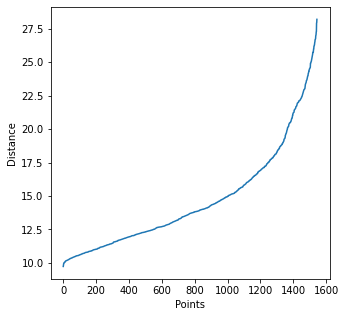

In [ ]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=100)
neighbors = nearest_neighbors.fit(X_embedded_TFIDF)

distances, indices = neighbors.kneighbors(X_embedded_TFIDF)
distances = np.sort(distances[:,99], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

16.49346374532512


<Figure size 360x360 with 0 Axes>

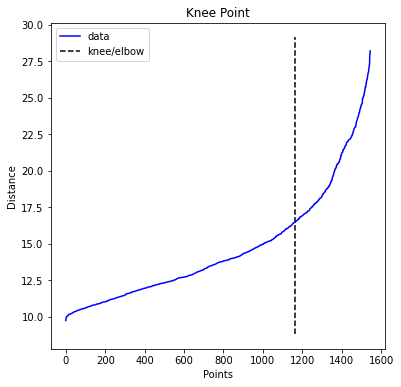

In [ ]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])
Epsilon_Value=[]
Epsilon=distances[knee.knee]
Epsilon_Value.append(Epsilon)

In [ ]:
Estimated_Clusters=[]
Estimated_Noise=[]
clustering = DBSCAN(eps=Epsilon, min_samples=100).fit(X_embedded_TFIDF)
cluster=clustering.labels_
cluster
no_clusters= len(set(cluster)) - (1 if -1 in cluster else 0)
no_noise = np.sum(np.array(cluster) == -1, axis=0)
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
Estimated_Clusters.append(no_clusters)
Estimated_Noise.append(no_noise)

Estimated no. of clusters: 1
Estimated no. of noise points: 32


In [ ]:
def show_clusters(X_embedded_TFIDF, cluster):
  df = pd.DataFrame(dict(x=X_embedded_TFIDF[:,0], y=X_embedded_TFIDF[:,1], label=cluster)) #writing in key value pairs  (dict)
  colors = {-1: 'orange', 0: 'green', 1:'red', 2:'blue', 3:'yellow'}
  fig, ax = plt.subplots(figsize=(8,8))
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()

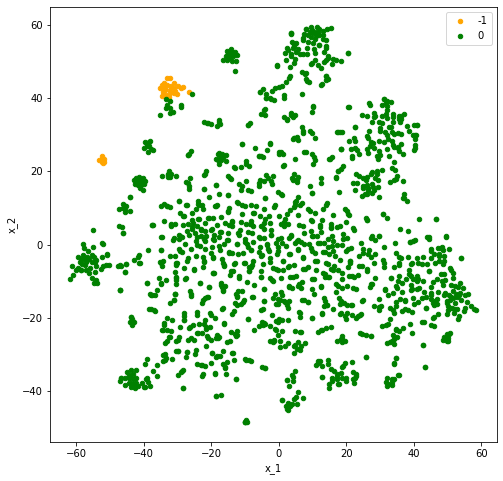

In [ ]:
show_clusters(X_embedded_TFIDF, cluster)

In [ ]:
n_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_TFIDF, cluster))
Silhouette_Score=[]
Silhouette_Score.append(metrics.silhouette_score(X_embedded_TFIDF, cluster))

1
Silhouette Coefficient: 0.191


In [ ]:
Epsilon=15
Epsilon_Value.append(Epsilon)
clustering = DBSCAN(eps=Epsilon, min_samples=100).fit(X_embedded_TFIDF)
cluster=clustering.labels_
cluster
no_clusters = len(set(cluster)) - (1 if -1 in cluster else 0)
no_noise = np.sum(np.array(cluster) == -1, axis=0)
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
Estimated_Clusters.append(no_clusters)
Estimated_Noise.append(no_noise)

Estimated no. of clusters: 1
Estimated no. of noise points: 73


In [ ]:
def show_clusters(X_embedded_TFIDF, cluster):
  df = pd.DataFrame(dict(x=X_embedded_TFIDF[:,0], y=X_embedded_TFIDF[:,1], label=cluster))
  colors = {-1: 'orange', 0: 'green', 1:'red', 2:'blue', 3:'yellow'}
  fig, ax = plt.subplots(figsize=(8,8))
  grouped = df.groupby('label')
  for key, group in grouped:
  
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()

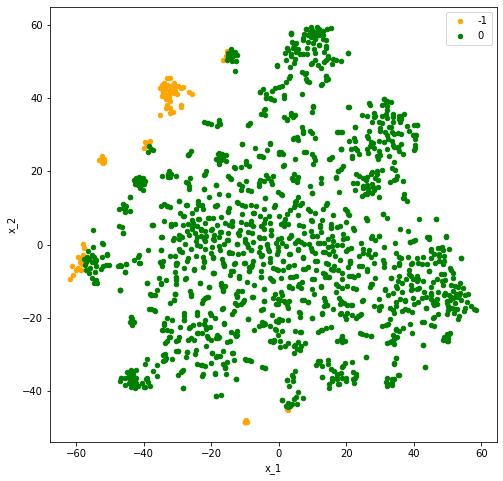

In [ ]:
show_clusters(X_embedded_TFIDF, cluster)

In [ ]:
n_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_TFIDF, cluster))
Silhouette_Score.append(metrics.silhouette_score(X_embedded_TFIDF, cluster))

1
Silhouette Coefficient: 0.216


In [ ]:
Epsilon=14.8


Epsilon_Value.append(Epsilon)
clustering = DBSCAN(eps=Epsilon, min_samples=100).fit(X_embedded_TFIDF)
cluster=clustering.labels_
cluster_main=cluster
no_clusters = len(set(cluster)) - (1 if -1 in cluster else 0)
no_noise = np.sum(np.array(cluster) == -1, axis=0)
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
Estimated_Clusters.append(no_clusters)
Estimated_Noise.append(no_noise)

Estimated no. of clusters: 2
Estimated no. of noise points: 74


In [ ]:
cluster

array([ 0,  0,  0, ...,  0, -1,  0])

In [ ]:
def show_clusters(X_embedded_TFIDF, cluster):
  df = pd.DataFrame(dict(x=X_embedded_TFIDF[:,0], y=X_embedded_TFIDF[:,1], label=cluster)) #writing in key value pairs  (dict)
  colors = {-1: 'orange', 0: 'green', 1:'red', 2:'blue'}
  fig, ax = plt.subplots(figsize=(8,8))
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()

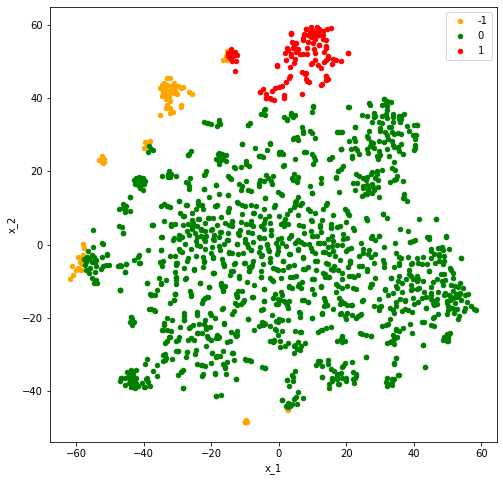

In [ ]:
show_clusters(X_embedded_TFIDF, cluster)

In [ ]:
n_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_TFIDF, cluster))
Silhouette_Score.append(metrics.silhouette_score(X_embedded_TFIDF, cluster))

2
Silhouette Coefficient: 0.179


In [ ]:
Epsilon=17.4
Epsilon_Value.append(Epsilon)
clustering = DBSCAN(eps=Epsilon, min_samples=100).fit(X_embedded_TFIDF)
cluster=clustering.labels_
cluster
no_clusters = len(set(cluster)) - (1 if -1 in cluster else 0)
no_noise = np.sum(np.array(cluster) == -1, axis=0)
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
Estimated_Clusters.append(no_clusters)
Estimated_Noise.append(no_noise)

Estimated no. of clusters: 1
Estimated no. of noise points: 17


In [ ]:
def show_clusters(X_embedded_TFIDF, cluster):
  df = pd.DataFrame(dict(x=X_embedded_TFIDF[:,0], y=X_embedded_TFIDF[:,1], label=cluster)) #writing in key value pairs  (dict)
  colors = {-1: 'orange', 0: 'green', 1:'red', 2:'blue'}
  fig, ax = plt.subplots(figsize=(8,8))
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()

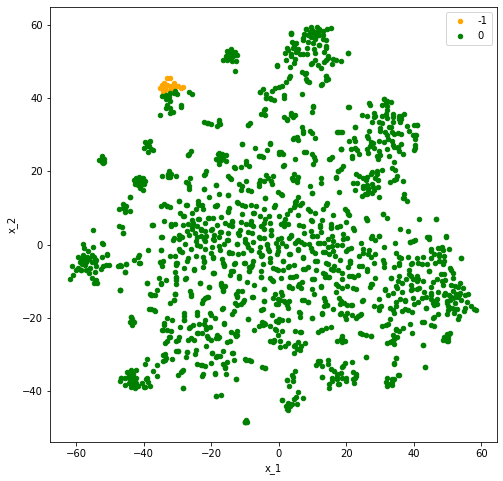

In [ ]:
show_clusters(X_embedded_TFIDF, cluster)

In [ ]:
n_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_TFIDF, cluster))
Silhouette_Score.append(metrics.silhouette_score(X_embedded_TFIDF, cluster))


1
Silhouette Coefficient: 0.174


##Compare the DBSCAN Cluster of TFIDF BoW

In [ ]:
data_TFIDF_tsne = {'Epsilon': Epsilon_Value,'Minimum Samples':[100,100,100,100],'Number of Clusters': Estimated_Clusters,'Number of Noise': Estimated_Noise,'Silhouette Score':Silhouette_Score
                   ,'Number of Neighbors in KNN': [100,100,100,100]}
DBSCAN_TFIDF_TSNE = pd.DataFrame(data_TFIDF_tsne)
DBSCAN_TFIDF_TSNE

,Epsilon,Minimum Samples,Number of Clusters,Number of Noise,Silhouette Score,Number of Neighbors in KNN
0,16.493464,100,1,32,0.191122,100
1,15.000000,100,1,73,0.215536,100
2,14.800000,100,2,74,0.179015,100
3,17.400000,100,1,17,0.174067,100


In [ ]:
Data_cluster_TFIDF=Data.copy()
Data_cluster_TFIDF['Cluster_Labels']=cluster_main
Data_cluster_TFIDF=Data_cluster_TFIDF.drop(['Description','FemaleTokens','MaleTokens','TotalMFTokens','Token_Labels'],axis=1)
Data_cluster_TFIDF = Data_cluster_TFIDF[Data_cluster_TFIDF.Cluster_Labels != -1]

In [ ]:
Data_cluster_TFIDF_male = Data_cluster_TFIDF[Data_cluster_TFIDF.Cluster_Labels != 1]
Data_cluster_TFIDF_male

,Trope,Cluster_Labels
0,abandonedarea,0
1,abandonedcatchphrase,0
2,abandonedhospital,0
3,abandonedmine,0
6,abandonedwarehouse,0
...,...,...
1539,marriageofalliance,0
1540,recountedbythemaincharacters,0
1541,bythepowerofgreyskull,0
1542,crouchingniceguyhiddenjerkass,0


In [ ]:
Data_cluster_TFIDF_female = Data_cluster_TFIDF[Data_cluster_TFIDF.Cluster_Labels != 0]
Data_cluster_TFIDF_female

,Trope,Cluster_Labels
4,abandonedplayground,1
5,abandonedwarchild,1
9,abandonthedisabled,1
38,absurdlyelderlymother,1
49,abusiveparents,1
...,...,...
1519,archnemesismom,1
1521,wickedstepfather,1
1526,youngerthanhelooks,1
1530,parentchildincest,1


In [ ]:
Data_cluster_TFIDF['Cluster_Labels'].value_counts()


0    1355
1     116
Name: Cluster_Labels, dtype: int64

##PCA- Dimentionality Reduction

In [ ]:
from sklearn import decomposition
pca=decomposition.PCA()

In [ ]:
X_PCA_TFIDF = pca.fit_transform(pairwise_distances_TFIDF)

In [ ]:
X_PCA_TFIDF #The number of principal components is equal to the number of features

array([[-1.09441455e+00, -2.62545672e-01,  6.24835548e-01, ...,
         1.23465377e-21,  2.94292300e-21, -1.20862692e-21],
       [-7.70471638e-01, -2.96934776e-01,  2.27004717e-01, ...,
         1.23465377e-21,  2.94292298e-21, -1.20862691e-21],
       [-6.15459380e-01, -1.09681881e-01,  2.81373716e-01, ...,
         1.23465376e-21,  2.94292296e-21, -1.20862689e-21],
       ...,
       [ 2.04845873e-01, -7.58466167e-02, -9.88054167e-02, ...,
         1.23465374e-21,  2.94292291e-21, -1.20862686e-21],
       [-6.95368102e-01, -1.84827563e-01, -8.81228729e-01, ...,
        -1.04602112e-17, -2.05250617e-17,  1.34836454e-18],
       [-2.45457629e-01, -1.91119950e-01,  5.49135651e-02, ...,
        -3.24667644e-18, -9.75134332e-18,  7.23783004e-18]])

Text(0, 0.5, 'Distance')

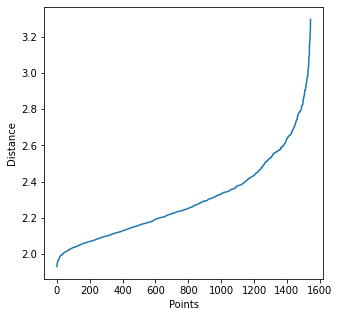

In [ ]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=100)
neighbors = nearest_neighbors.fit(X_PCA_TFIDF)

distances, indices = neighbors.kneighbors(X_PCA_TFIDF)
distances = np.sort(distances[:,99], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

2.5227953849173197


<Figure size 360x360 with 0 Axes>

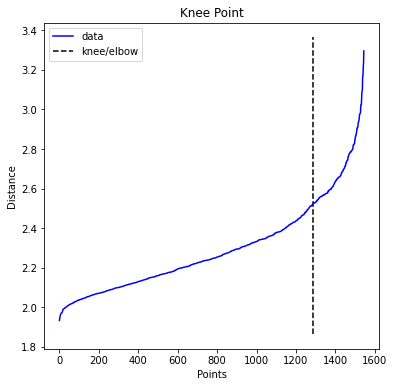

In [ ]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [ ]:
clustering = DBSCAN(eps=2.52, min_samples=100).fit(X_PCA_TFIDF)
cluster=clustering.labels_
cluster
no_clusters = len(set(cluster)) - (1 if -1 in cluster else 0)
no_noise = np.sum(np.array(cluster) == -1, axis=0)
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 1
Estimated no. of noise points: 0


In [ ]:
def show_clusters(X_PCA_TFIDF, cluster):
  df = pd.DataFrame(dict(x=X_PCA_TFIDF[:,0], y=X_PCA_TFIDF[:,1], label=cluster))
  colors = {-1: 'red', 0: 'blue', 1:'orange', 2:'green', 3:'yellow'}
  fig, ax = plt.subplots(figsize=(8,8))
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()

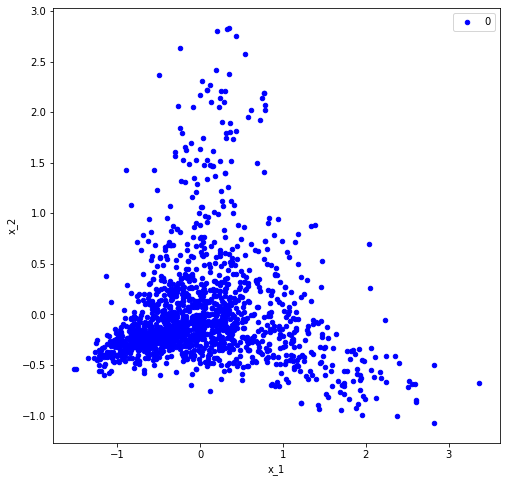

In [ ]:
show_clusters(X_PCA_TFIDF, cluster)

Diemnsionality reduction using PCA cannot be done in this case. The Data is large and PCA cannot give a good output

##HDBSCAN 

In [28]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 16.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340295 sha256=a289722740faa39747c7b233639730e8f0ea0de06eebcfe8a015fba9395e4863
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


##HDBSCAN - CountVectorizer

In [ ]:
X_embedded_countvectorizer

array([[-37.20079   ,   1.6735759 ],
       [-33.658985  ,  -9.72554   ],
       [-10.1502495 ,   0.71867216],
       ...,
       [ 32.804005  ,  10.285959  ],
       [-46.44177   , -24.199547  ],
       [-11.250597  , -15.479611  ]])

In [29]:
import hdbscan

In [ ]:
clusterer=hdbscan.HDBSCAN(min_cluster_size=100,min_samples=8).fit(X_embedded_countvectorizer)
labels = clusterer.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
n_noise=np.sum(np.array(labels)==-1,axis=0)
print('Estimated number of noise: %d' % n_noise)
Esti_clusters=[]
Esti_noise=[]
mini_sa=[]
Silhouette_Score=[]
Esti_clusters.append(n_clusters_)
Esti_noise.append(n_noise)
mini_sa.append(8)

Estimated number of clusters: 2
Estimated number of noise: 49


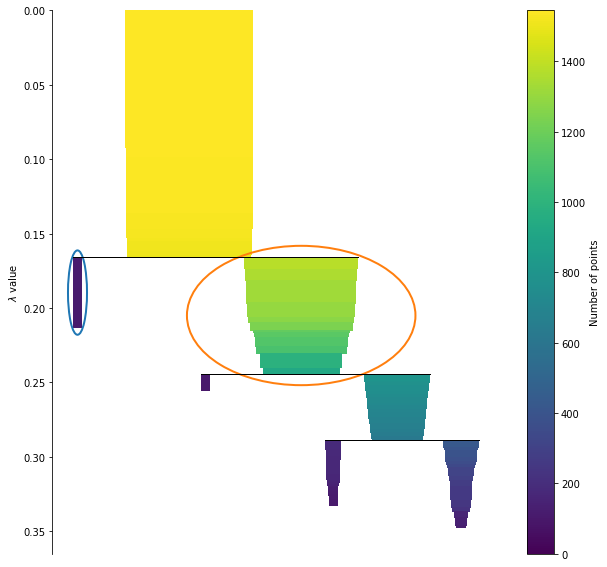

In [ ]:
plt.figure(figsize=(10,10))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

In [ ]:
from sklearn import metrics
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_countvectorizer, labels))
Silhouette_Score.append(metrics.silhouette_score(X_embedded_countvectorizer, labels))

2
Silhouette Coefficient: 0.148


In [ ]:
clusterer=hdbscan.HDBSCAN(min_cluster_size=100,min_samples=5).fit(X_embedded_countvectorizer)
labels = clusterer.labels_
cluster_main_count=labels
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
n_noise=np.sum(np.array(labels)==-1,axis=0)
print('Estimated number of noise: %d' % n_noise)
Esti_clusters.append(n_clusters_)
Esti_noise.append(n_noise)
mini_sa.append(5)

Estimated number of clusters: 2
Estimated number of noise: 20


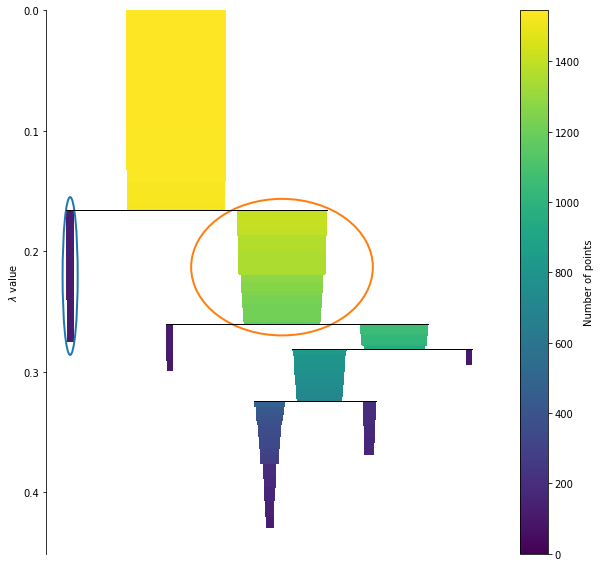

In [ ]:
plt.figure(figsize=(10,10))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

In [ ]:
 n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_countvectorizer, labels))
Silhouette_Score.append(metrics.silhouette_score(X_embedded_countvectorizer, labels))

2
Silhouette Coefficient: 0.123


In [ ]:
clusterer=hdbscan.HDBSCAN(min_cluster_size=100,min_samples=11).fit(X_embedded_countvectorizer)
labels = clusterer.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
n_noise=np.sum(np.array(labels)==-1,axis=0)
print('Estimated number of noise: %d' % n_noise)
Esti_clusters.append(n_clusters_)
Esti_noise.append(n_noise)
mini_sa.append(11)

Estimated number of clusters: 2
Estimated number of noise: 118


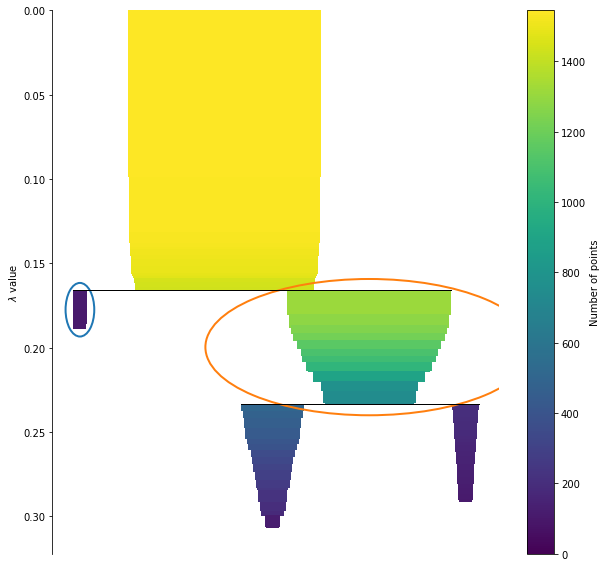

In [ ]:
plt.figure(figsize=(10,10))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_countvectorizer, labels))
Silhouette_Score.append(metrics.silhouette_score(X_embedded_countvectorizer, labels))

2
Silhouette Coefficient: 0.140


In [ ]:
Hdata_count = {'Minimum Cluster Size':[100,100,100],'Minimum Samples': mini_sa,'Number of Clusters': Esti_clusters,'Number of Noise': Esti_noise,'Silhouette Score':Silhouette_Score
                   }
HDBSCAN_count = pd.DataFrame(Hdata_count)
HDBSCAN_count

,Minimum Cluster Size,Minimum Samples,Number of Clusters,Number of Noise,Silhouette Score
0,100,8,2,49,0.147861
1,100,5,2,20,0.122814
2,100,11,2,118,0.140391


In [ ]:
Data_cluster_Count_HDBSCAN=Data.copy()
Data_cluster_Count_HDBSCAN['Cluster_Labels']=cluster_main_count
Data_cluster_Count_HDBSCAN.drop(['Description','FemaleTokens','MaleTokens','TotalMFTokens'],axis=1)

,Trope,Token_Labels,Cluster_Labels
0,abandonedarea,0,1
1,abandonedcatchphrase,0,1
2,abandonedhospital,0,1
3,abandonedmine,0,1
4,abandonedplayground,0,0
...,...,...,...
1540,recountedbythemaincharacters,0,1
1541,bythepowerofgreyskull,0,1
1542,crouchingniceguyhiddenjerkass,0,1
1543,narroweditdowntotheguyirecognise,0,1


In [ ]:
Data_cluster_Count_HDBSCAN['Cluster_Labels'].value_counts()

 1    1408
 0     117
-1      20
Name: Cluster_Labels, dtype: int64

In [ ]:
Data_cluster_Count_HDBSCAN=Data_cluster_Count_HDBSCAN[Data_cluster_Count_HDBSCAN.Cluster_Labels != -1]

In [ ]:
#female gendered tropes
Data_cluster_Count_HDBSCAN_female = Data_cluster_Count_HDBSCAN[Data_cluster_Count_HDBSCAN.Cluster_Labels != 1]
Data_cluster_Count_HDBSCAN_female.drop(['Description','FemaleTokens','MaleTokens','TotalMFTokens'],axis=1)

,Trope,Token_Labels,Cluster_Labels
4,abandonedplayground,0,0
5,abandonedwarchild,1,0
9,abandonthedisabled,0,0
26,aboyagirlandababyfamily,0,0
38,absurdlyelderlymother,1,0
...,...,...,...
1518,playinghamlet,0,0
1521,wickedstepfather,1,0
1526,youngerthanhelooks,0,0
1530,parentchildincest,0,0


In [ ]:
#male gendered tropes
Data_cluster_Count_HDBSCAN_male = Data_cluster_Count_HDBSCAN[Data_cluster_Count_HDBSCAN.Cluster_Labels != 0]
Data_cluster_Count_HDBSCAN_male.drop(['Description','FemaleTokens','MaleTokens','TotalMFTokens'],axis=1)

,Trope,Token_Labels,Cluster_Labels
0,abandonedarea,0,1
1,abandonedcatchphrase,0,1
2,abandonedhospital,0,1
3,abandonedmine,0,1
6,abandonedwarehouse,0,1
...,...,...,...
1540,recountedbythemaincharacters,0,1
1541,bythepowerofgreyskull,0,1
1542,crouchingniceguyhiddenjerkass,0,1
1543,narroweditdowntotheguyirecognise,0,1


##HDBSCAN - TFIDF Vector

In [68]:
clusterer=hdbscan.HDBSCAN(min_cluster_size=100,min_samples=2).fit(X_embedded_TFIDF)
labels = clusterer.labels_
cluster_main=labels
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
n_noise=np.sum(np.array(labels)==-1,axis=0)
print('Estimated number of noise: %d' % n_noise)
Esti_clusters=[]
Esti_noise=[]
mini_sa=[]
Silhouette_Score=[]
Esti_clusters.append(n_clusters_)
Esti_noise.append(n_noise)
mini_sa.append(2)

Estimated number of clusters: 3
Estimated number of noise: 231


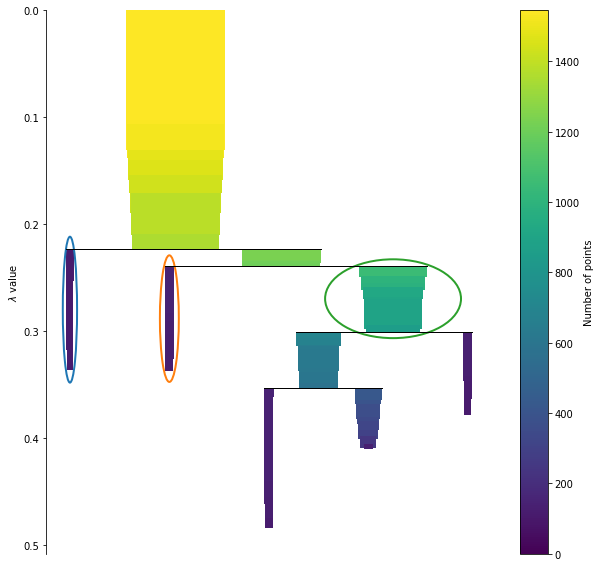

In [59]:
plt.figure(figsize=(10,10))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

In [60]:
from sklearn import metrics
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_TFIDF, labels))
Silhouette_Score.append(metrics.silhouette_score(X_embedded_TFIDF, labels))

3
Silhouette Coefficient: 0.122


In [61]:
clusterer=hdbscan.HDBSCAN(min_cluster_size=100,min_samples=5).fit(X_embedded_TFIDF)
labels = clusterer.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
n_noise=np.sum(np.array(labels)==-1,axis=0)
print('Estimated number of noise: %d' % n_noise)
Esti_clusters.append(n_clusters_)
Esti_noise.append(n_noise)
mini_sa.append(5)

Estimated number of clusters: 5
Estimated number of noise: 543


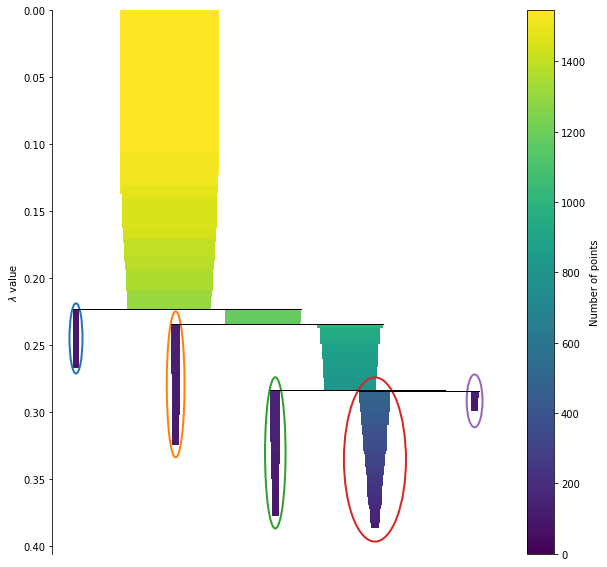

In [62]:
plt.figure(figsize=(10,10))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

In [63]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_TFIDF, labels))
Silhouette_Score.append(metrics.silhouette_score(X_embedded_TFIDF, labels))

5
Silhouette Coefficient: 0.138


In [64]:
clusterer=hdbscan.HDBSCAN(min_cluster_size=100,min_samples=8).fit(X_embedded_TFIDF)
labels = clusterer.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
n_noise=np.sum(np.array(labels)==-1,axis=0)
print('Estimated number of noise: %d' % n_noise)
Esti_clusters.append(n_clusters_)
Esti_noise.append(n_noise)
mini_sa.append(8)

Estimated number of clusters: 4
Estimated number of noise: 387


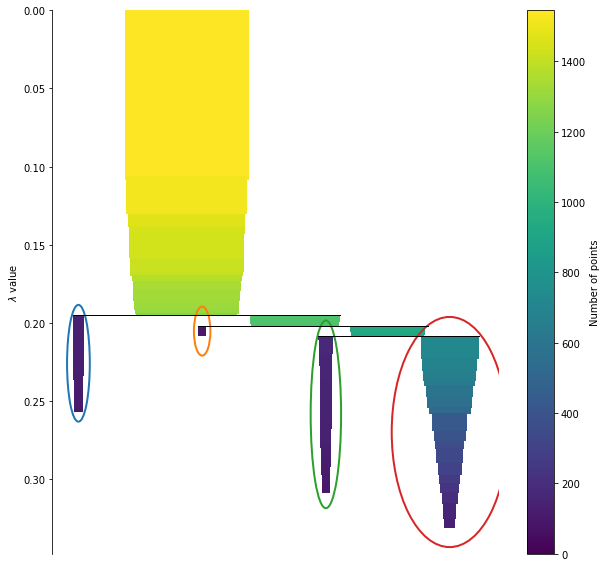

In [65]:
plt.figure(figsize=(10,10))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

In [66]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_TFIDF, labels))
Silhouette_Score.append(metrics.silhouette_score(X_embedded_TFIDF, labels))

4
Silhouette Coefficient: 0.207


In [67]:
Hdata_count = {'Minimum Cluster Size':[100,100,100],'Minimum Samples': mini_sa,'Number of Clusters': Esti_clusters,'Number of Noise': Esti_noise,'Silhouette Score':Silhouette_Score
                   }
HDBSCAN_count = pd.DataFrame(Hdata_count)
HDBSCAN_count

,Minimum Cluster Size,Minimum Samples,Number of Clusters,Number of Noise,Silhouette Score
0,100,2,3,231,0.121819
1,100,5,5,543,0.138357
2,100,8,4,387,0.207107


In [70]:
Data_cluster_TFIDF_HDBSCAN=Data.copy()
Data_cluster_TFIDF_HDBSCAN['Cluster_Labels']=cluster_main
Data_cluster_TFIDF_HDBSCAN.drop(['Description','FemaleTokens','MaleTokens','TotalMFTokens'],axis=1)

,Trope,Cluster_Labels
0,abandonedarea,-1
1,abandonedcatchphrase,2
2,abandonedhospital,-1
3,abandonedmine,-1
4,abandonedplayground,0
...,...,...
1540,recountedbythemaincharacters,2
1541,bythepowerofgreyskull,2
1542,crouchingniceguyhiddenjerkass,1
1543,narroweditdowntotheguyirecognise,2


In [72]:
Data_cluster_TFIDF_HDBSCAN=Data_cluster_TFIDF_HDBSCAN[Data_cluster_TFIDF_HDBSCAN.Cluster_Labels != -1]
Data_cluster_TFIDF_HDBSCAN

,Trope,Description,FemaleTokens,MaleTokens,TotalMFTokens,Cluster_Labels
1,abandonedcatchphrase,catchphrases are a great and simple way to hel...,23.0,29.0,52.0,2
4,abandonedplayground,there's just something about the image of a pl...,16.0,24.0,40.0,0
5,abandonedwarchild,"often times during or after a war, women are l...",60.0,51.0,111.0,0
9,abandonthedisabled,a character with a disability or deformity is ...,36.0,66.0,102.0,0
10,abbeyroadcrossing,the cover for the beatles' album abbey road is...,3.0,22.0,25.0,2
...,...,...,...,...,...,...
1540,recountedbythemaincharacters,"sometimes, ""this is a true story"" is part of t...",109.0,728.0,837.0,2
1541,bythepowerofgreyskull,lots of phlebotinum is voice activated: kirk t...,178.0,966.0,1144.0,2
1542,crouchingniceguyhiddenjerkass,you meet someone you think is a really nice gu...,760.0,1003.0,1763.0,1
1543,narroweditdowntotheguyirecognise,big-name actors tend to get major roles in med...,583.0,2109.0,2692.0,2


In [73]:
Data_cluster_TFIDF_HDBSCAN['Cluster_Labels'].value_counts()

2    1056
1     147
0     111
Name: Cluster_Labels, dtype: int64